<!-- Forecasting Walmart Sales with Machine Learning -->
In this machine learning project, we utilize historical Walmart sales data to predict store sales. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
walmart_data = pd.read_csv('Walmart DataSet.csv')

In [3]:
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
walmart_data['Date_4'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y' )

In [8]:
walmart_data['Day'] = walmart_data['Date_4'].dt.day
walmart_data['Month'] = walmart_data['Date_4'].dt.month
walmart_data['Year'] = walmart_data['Date_4'].dt.year

In [9]:
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_4,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,5,2,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,12,2,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,5,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,12,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,19,10,2012


In [10]:
# Extracting the weekly dates
walmart_data['Week of Year'] = walmart_data['Date_4'].dt.isocalendar().week.astype('int')

In [11]:
# Quarterly in Year
walmart_data['Quarter'] = walmart_data['Date_4'].dt.quarter.astype('int')

In [12]:
walmart_df = walmart_data.drop(columns =['Date'])

In [13]:
walmart_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_4,Day,Month,Year,Week of Year,Quarter
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,5,2,2010,5,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,12,2,2010,6,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,19,2,2010,7,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,26,2,2010,8,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,5,3,2010,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,28,9,2012,39,3
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,5,10,2012,40,4
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,12,10,2012,41,4
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,19,10,2012,42,4


<!-- Exploratory Data Analysis -->
Let us explore the trends between several input columns and target column Weeky_Sales
Visualizing heatmap of correlation matrix

<Axes: >

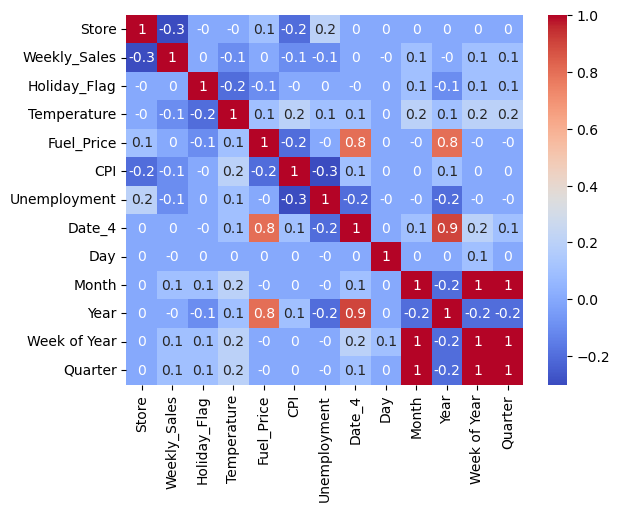

In [40]:
sns.heatmap(walmart_df.corr().round(decimals = 1) , cmap = 'coolwarm',  annot = True)

<!-- What is the trend in sales through all the weeks of the year? -->

[]

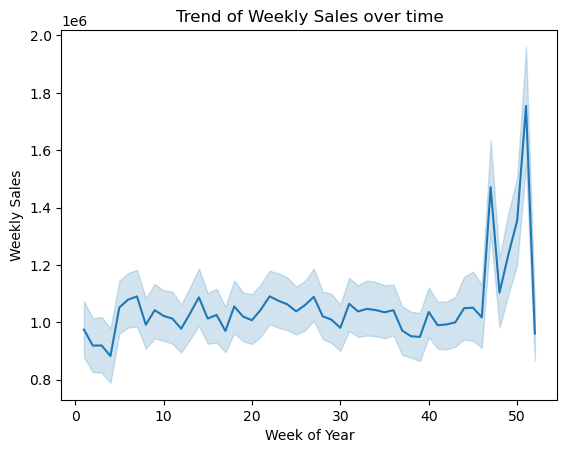

In [15]:
sns.lineplot(data = walmart_df , x = 'Week of Year' ,  y = 'Weekly_Sales')
plt.xlabel('Week of Year')
plt.ylabel('Weekly Sales')
plt.title('Trend of Weekly Sales over time')

plt.plot()

<!-- How does weekly sales look like for different stores? -->

[]

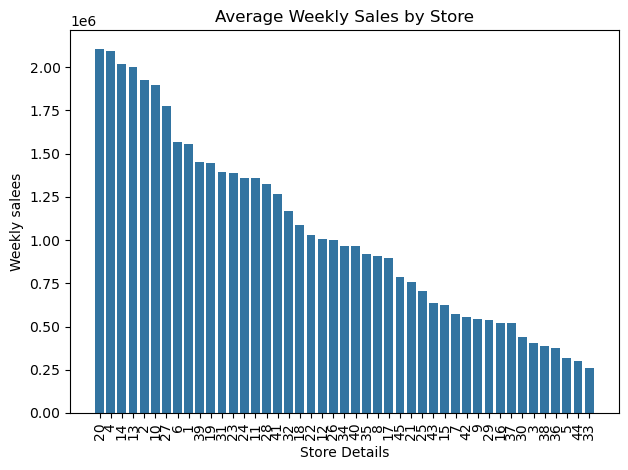

In [16]:
avg_sales_store  = walmart_df.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(data = avg_sales_store , x = 'Store' , y = 'Weekly_Sales' , order = avg_sales_store.sort_values('Weekly_Sales' ,ascending = False)
            ['Store'])
plt.xlabel('Store Details')
plt.ylabel('Weekly salees')
plt.title ('Average Weekly Sales by Store')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.plot()
            

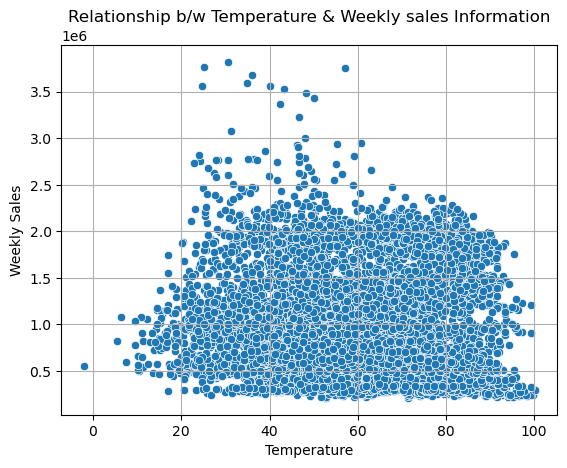

In [17]:
sns.scatterplot(data = walmart_df, x = 'Temperature' , y = 'Weekly_Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Relationship b/w Temperature & Weekly sales Information')
plt.grid(True)
plt.show()

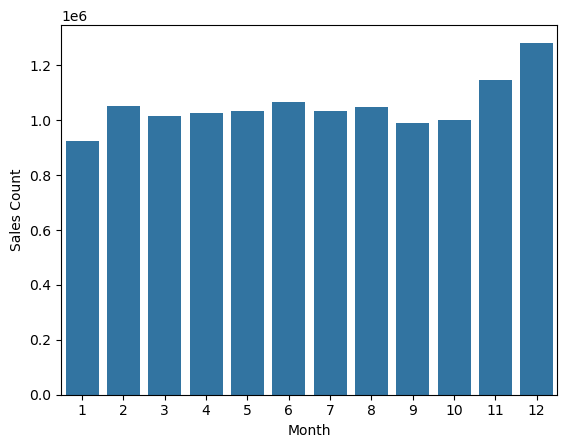

In [18]:
avg_sales_month_wise  = walmart_df.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(data =avg_sales_month_wise, x = 'Month'  , y = 'Weekly_Sales' )
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.show()

<!-- Weekly sales for holiday vs. non-holiday weeks -->

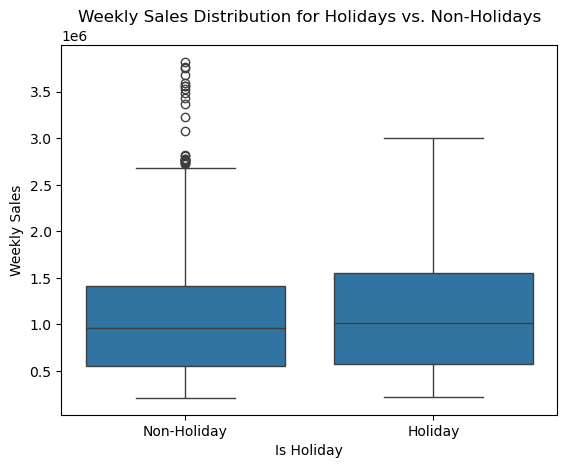

In [19]:
sns.boxplot(data=walmart_df, x='Holiday_Flag', y='Weekly_Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution for Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

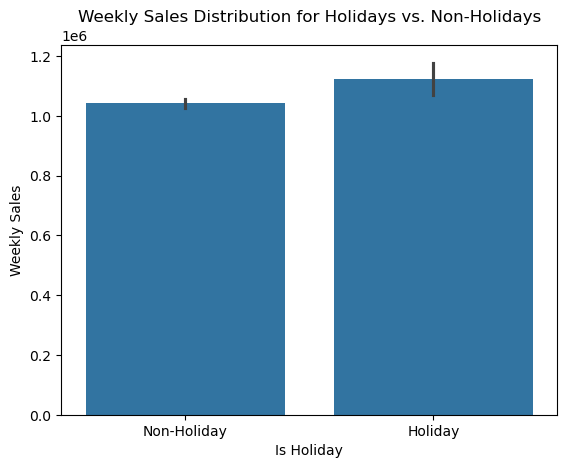

In [20]:
sns.barplot(data=walmart_df, x='Holiday_Flag', y='Weekly_Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution for Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

<!-- average weekly sales for all the years -->

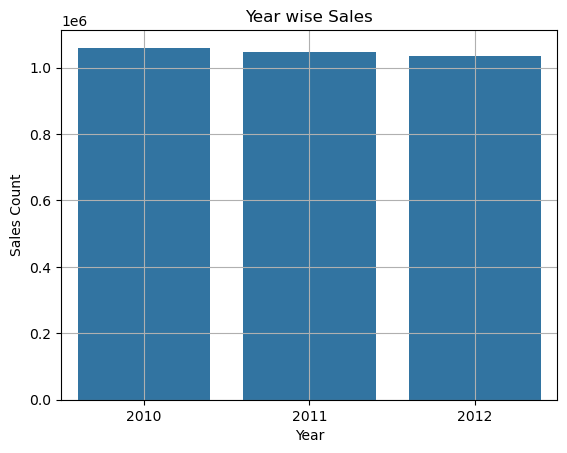

In [21]:
avg_sales_year_wise  = walmart_df.groupby('Year')['Weekly_Sales'].mean().reset_index()
sns.barplot(data =avg_sales_year_wise, x = 'Year'  , y = 'Weekly_Sales' )
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Year wise Sales')
plt.grid(True)
plt.show()

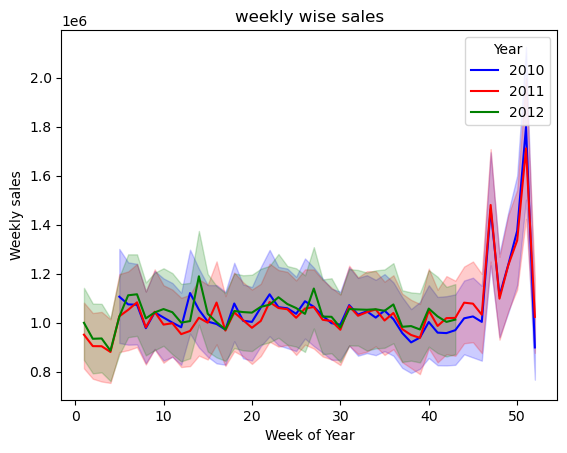

In [22]:
sns.lineplot(walmart_df, x = 'Week of Year' , y = 'Weekly_Sales', hue = 'Year' , palette = ['blue' , 'red','green'])
plt.xlabel('Week of Year')
plt.ylabel('Weekly sales')
plt.title('weekly wise sales')
plt.show()

<!-- The above yearly trends seem to follow similar sales trends - there are spikes around holiday weeks -->

<!-- Avg Sales by yearly quarter -->

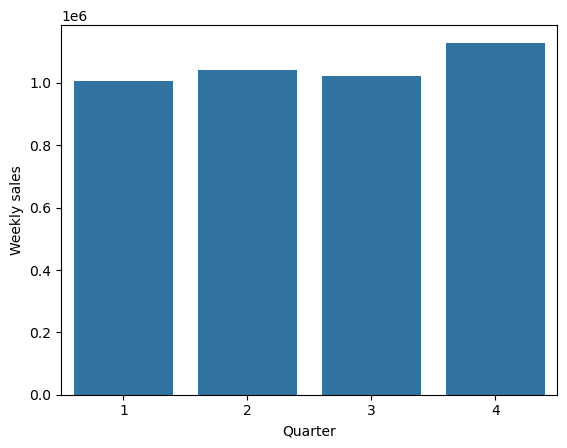

In [23]:
avg_sales_bymonth = walmart_df.groupby('Quarter')['Weekly_Sales'].mean().reset_index()
sns.barplot(data = avg_sales_bymonth , y= 'Weekly_Sales' , x = 'Quarter' )
plt.ylabel('Weekly sales')
plt.xlabel('Quarter')
plt.show()

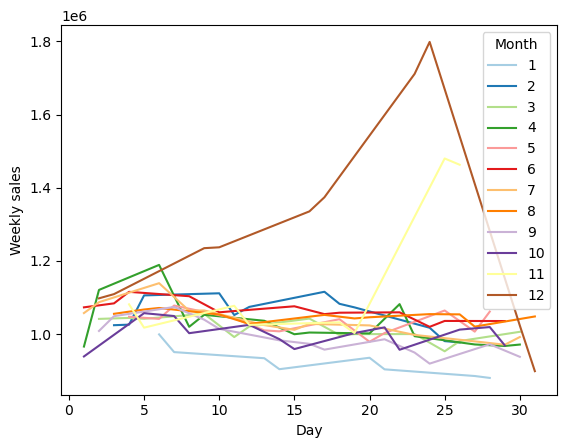

In [24]:
avg_sales_byday_month = walmart_df.groupby(['Day','Month'])['Weekly_Sales'].mean().reset_index()
sns.lineplot(data = avg_sales_byday_month , y= 'Weekly_Sales' , x = 'Day' , hue  = 'Month' , palette = sns.color_palette('Paired' , 12))
plt.ylabel('Weekly sales')
plt.xlabel('Day')
plt.show()

<!-- above Shows that 12th month has spike in sales in b/w 16-25 dates -->

In [25]:
# Test train the data
train_size = int(len(walmart_df) * 0.8)
train_data , test_data = walmart_df[:train_size], walmart_df[train_size: ]

In [26]:
walmart_df.shape

(6435, 13)

In [27]:
train_data.shape

(5148, 13)

In [28]:
test_data.shape

(1287, 13)

In [29]:
# importing the needed modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import matplotlib.pyplot as plt

In [30]:
prophet_model = Prophet(weekly_seasonality = True, yearly_seasonality = True)
prophet_model.fit(train_data[['Date_4','Weekly_Sales']].rename(columns = {'Date_4' : 'ds' , 'Weekly_Sales' : 'y'}))

14:07:25 - cmdstanpy - INFO - Chain [1] start processing
14:07:25 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = prophet_model.make_future_dataframe(periods = 12 , freq = 'W')

In [32]:
forecast = prophet_model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,1.507595e+06,7.936074e+05,2.249133e+06
144,2012-11-04,1.560531e+06,8.873393e+05,2.287901e+06
145,2012-11-11,1.634047e+06,9.503376e+05,2.369690e+06
146,2012-11-18,1.688499e+06,9.496532e+05,2.488638e+06
147,2012-11-25,1.727391e+06,1.016694e+06,2.419188e+06
148,2012-12-02,1.794216e+06,1.103959e+06,2.548777e+06
149,2012-12-09,1.904556e+06,1.210965e+06,2.652437e+06
150,2012-12-16,1.995212e+06,1.242831e+06,2.749048e+06
151,2012-12-23,1.965471e+06,1.247641e+06,2.640590e+06
152,2012-12-30,1.781348e+06,1.022532e+06,2.526810e+06


In [33]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          155 non-null    datetime64[ns]
 1   trend                       155 non-null    float64       
 2   yhat_lower                  155 non-null    float64       
 3   yhat_upper                  155 non-null    float64       
 4   trend_lower                 155 non-null    float64       
 5   trend_upper                 155 non-null    float64       
 6   additive_terms              155 non-null    float64       
 7   additive_terms_lower        155 non-null    float64       
 8   additive_terms_upper        155 non-null    float64       
 9   weekly                      155 non-null    float64       
 10  weekly_lower                155 non-null    float64       
 11  weekly_upper                155 non-null    float64       

In [34]:
forecast[['yhat','yhat_lower','yhat_upper']]=forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

In [35]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,1507595,793607,2249132
144,2012-11-04,1560531,887339,2287901
145,2012-11-11,1634046,950337,2369690
146,2012-11-18,1688499,949653,2488637
147,2012-11-25,1727391,1016693,2419187
148,2012-12-02,1794216,1103959,2548777
149,2012-12-09,1904556,1210965,2652436
150,2012-12-16,1995212,1242831,2749048
151,2012-12-23,1965471,1247640,2640590
152,2012-12-30,1781348,1022532,2526809


In [46]:
test_data_subset = test_data.head(len(forecast))
mae = mean_absolute_error(test_data_subset['Weekly_Sales'], forecast['yhat'])
mae

658053.6598709677

C:\Users\manoj\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\manoj\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


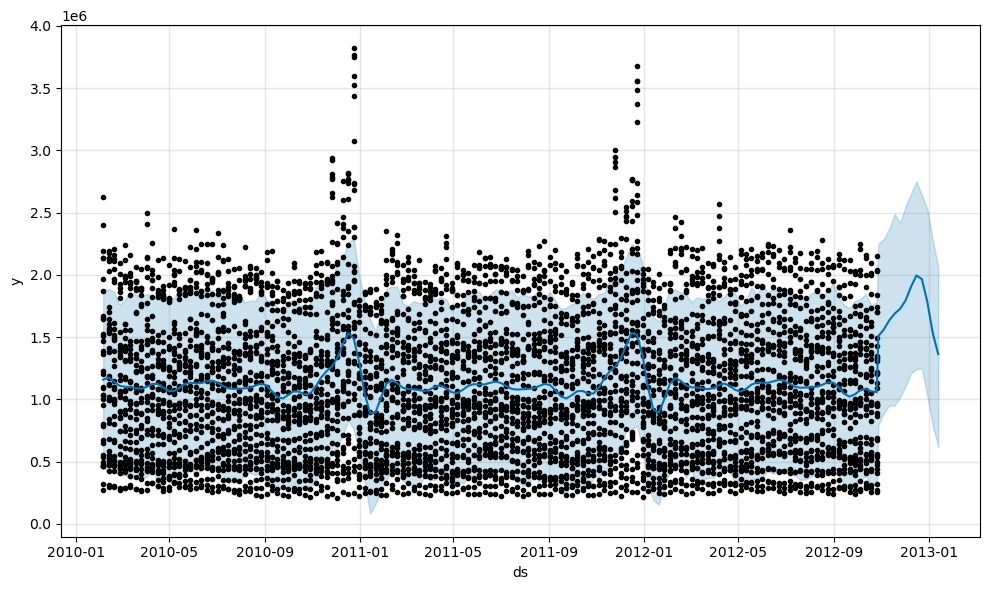

In [36]:
confirmed_forecast = prophet_model.plot(forecast)

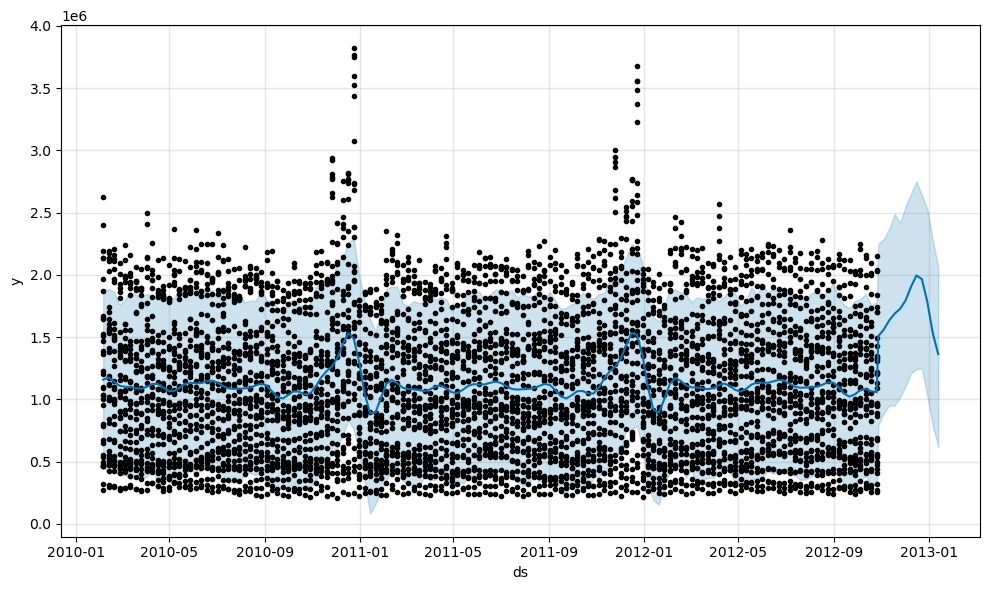

In [37]:
fig = prophet_model.plot(forecast)
plt.show()

C:\Users\manoj\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\manoj\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\manoj\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

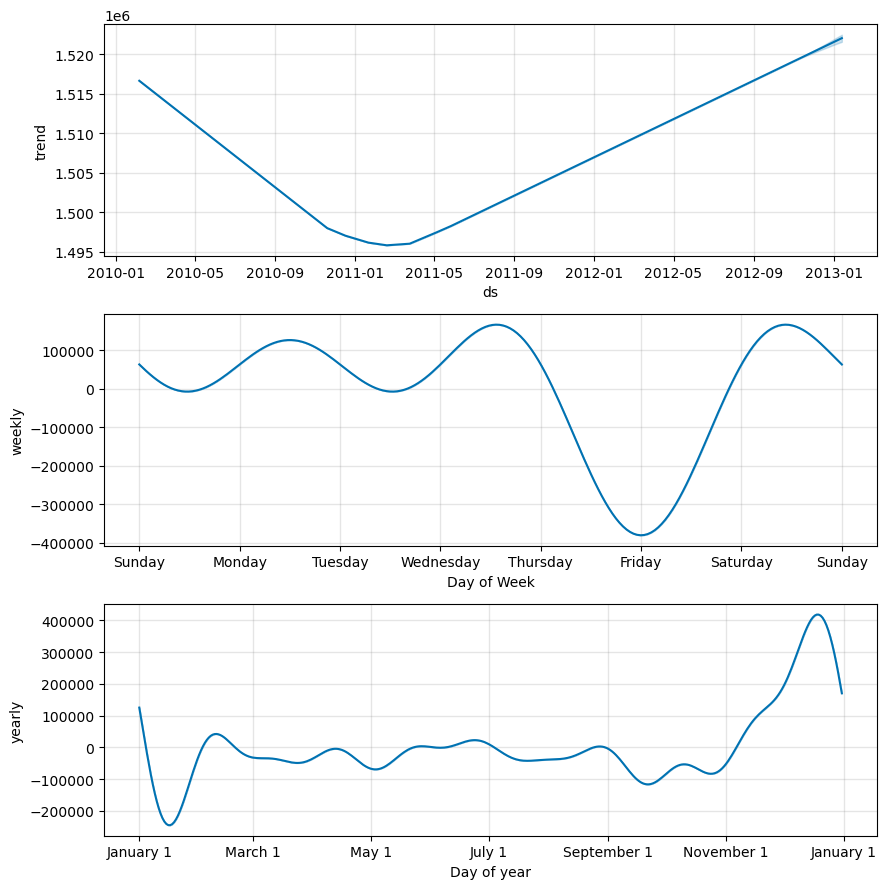

In [38]:
confirmed_forecast = prophet_model.plot_components(forecast)